In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

2023-12-15 11:37:04.134241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 11:37:04.134489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 11:37:04.308975: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 11:37:04.809769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-15 11:37:08.458374: W tensorflow/comp

## Create a Simple Neural Network in Python

The best way to understand how neural networks work is to learn how to build one from scratch without using any library.

So, what is a Neural network?
The neural network is an algorithm inspired from the structure of the neurons inside a human brain. So, it is basically composed of neurons, connected together by synapses. If there is sufficient synaptic inputs to a neuron, then that neuron will  be activated. We call this process “thinking”.

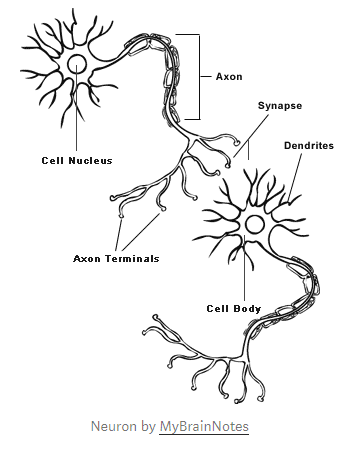

We can model this process by creating a neural network on a computer. The diagram below shows the architecture of a 2-layer Neural Network.


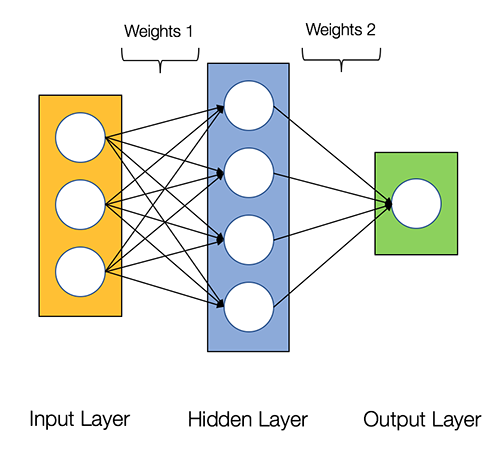

Neural Networks consist of the following components:
- An input layer, x
- An arbitrary amount of hidden layers 
- An output layer, ŷ
- A set of weights and biases between each layer, W and b
- A choice of activation function for each hidden layer, σ. In this case, we will use a Sigmoid activation function.

We’re going to train the neural network to solve the problem below. The first four examples are called a training set. Can you work out the pattern? Should the answer be 0 or 1? Give an explanation of your answer.

| Input | Output   |
|------|------|
|   0 0 1  | 0|
|   1 1 1  | 1|
|   1 0 1  | 1|
|   0 1 1  | 0|
|   1 0 0  | ?|

In [ ]:
# output: 

The neural network that we are going to create has the following visual representation:
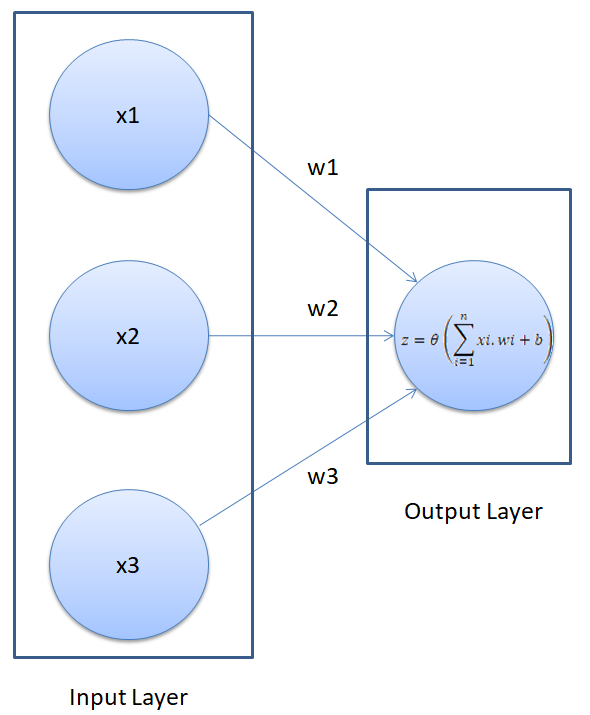

In order to teach our neuron we will give each input a weight, which can be a positive or negative number. An input with a large positive weight or a large negative weight, will have a strong effect on the neuron’s output. Before we start, we set each weight to a random number. Then we begin the training process:

1. Take the inputs from a training set example, adjust them by the weights, and pass them through a special formula to calculate the neuron’s output. Also known as $\textbf{feedforward}$.
2. Calculate the error, which is the difference between the neuron’s output and the desired output in the training set example. This is called the $\textbf{loss function}$.
3. Depending on the direction of the error, adjust the weights slightly. Also known as $\textbf{backpropagation}$.
4. Repeat this process a fixed number of iteration times.

Let's start with the first point: 
- Take the weighted sum of the neuron’s inputs, which is:
$weight_1 \cdot input_1 + weight_2 \cdot input_2 + weight_3 \cdot input_3 = \sum weight_i \cdot input_i  $. (1)

Next we normalise this, so the result is between 0 and 1. In order to do this, we will use a mathematically convenient function, called the Sigmoid function which is an normalization function shaped as a S. This function can map any value to a value from 0 to 1. It will assist us to normalize the weighted sum of the inputs.

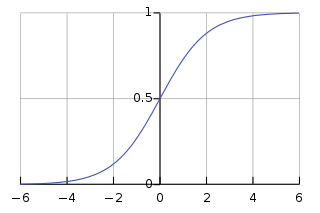

It's mathematical formulation is : $\frac{1}{1+e^{-x}}$. (2)

So by substituting the first equation into the second, the final formula for the output of the neuron is:

**Output of neuron** $= \sigma ( \sum weight_i \cdot input_i )= \frac{1}{1+e^{-\sum weight_i \cdot input_i}}$

You now have all the information to write the code for the first step

Represent the training set shown earlier and the numbers should be stored like:
$
\begin{bmatrix}
 0  &0  &1 \\ 
 1  &1  &1 \\ 
 1  &0  &1 \\ 
 0  &1  &1 
\end{bmatrix}\begin{bmatrix}
0\\ 
1\\ 
1\\ 
0
\end{bmatrix}$

### Initialization

In [3]:
from numpy import exp, array, random, dot

# initialize the dataset
dataset = array([
    [0, 0, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 1],
    [1, 1, 1, 0]
])

# Separate inputs and labels
inputs = dataset[:, :-1]  # all columns except the last one
labels = dataset[:, -1]   # last column

In [4]:
inputs

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [5]:
labels

array([0, 1, 1, 0])

Define the function initializing the initial random weights:

In [6]:
# function to initialize random weights

def initialize_weights(num_features):
    """
    Initialize random weights for a neuron.

    Parameters:
    - num_features (int): Number of input features.

    Returns:
    - weights (ndarray): Array of random weights.
    """
    random.seed(42)  # for reproducibility
    weights = random.rand(num_features)
    return weights

In [7]:
# Example usage:
num_input_features = 3
initial_weights = initialize_weights(num_input_features)
print("Initial Random Weights:", initial_weights)


Initial Random Weights: [0.37454012 0.95071431 0.73199394]


### Feedforward

Define the function of the sigmoid:

In [8]:
# The Sigmoid function describes an S shaped curve.
# We pass the weighted sum of the inputs through this function to normalise it between 0 and 1.
from numpy import exp

def sigmoid(x):
    """
    Sigmoid activation function.

    Parameters:
    - x (ndarray): Input to the sigmoid function.

    Returns:
    - output (ndarray): Output after applying the sigmoid activation.
    """
    return 1 / (1 + exp(-x))

In [9]:
# Example usage:
input_value = 0.5
sigmoid_output = sigmoid(input_value)
print("Sigmoid Output for input", input_value, ":", sigmoid_output)

Sigmoid Output for input 0.5 : 0.6224593312018546


Notion of bias: The nodes in the input layer are connected with the output layer via three weight parameters. In the output layer, the values in the input nodes are multiplied with their corresponding weights and are added together. Finally, the bias term is added to the sum.

Define the function calculating the output of the neuron:


In [10]:
# function to calculate the neuron output
from numpy import dot

def neuron_output(inputs, weights, bias):
    """
    Calculate the output of a neuron.

    Parameters:
    - inputs (ndarray): Input values.
    - weights (ndarray): Weights associated with each input.
    - bias (float): Bias term for the neuron.

    Returns:
    - output (float): Output of the neuron after applying the sigmoid activation.
    """
    # Calculate the weighted sum
    weighted_sum = dot(inputs, weights)
    
    # Add the bias term
    weighted_sum_with_bias = weighted_sum + bias
    
    # Apply the sigmoid activation function
    output = 1 / (1 + exp(-weighted_sum_with_bias))
    
    return output

In [16]:
# Example usage:
inputs_example = inputs  # Replace with input values
weights_example = initial_weights  # Replace with weights
bias_example = 0.1  # Replace with bias value

neuron_output_example = neuron_output(inputs_example, weights_example, bias_example)
print("Output of the neuron:", neuron_output_example)

Output of the neuron: [0.69677637 0.85603096 0.76968512 0.89634417]


### Loss function

Now that we coded the elements necessary for the first step let's go to the second step, the loss function (output error). In the case of this very simple neural network, the error is simply the difference between the desired output and the predicted output: 

In [17]:
# function to calculate the error
def calculate_loss(actual_output, predicted_output):
    """
    Calculate the loss (error) between the actual output and the predicted output.

    Parameters:
    - actual_output (float): The true (desired) output.
    - predicted_output (float): The predicted output from the neural network.

    Returns:
    - loss (float): The loss between actual and predicted output.
    """
    loss = 0.5 * (actual_output - predicted_output) ** 2
    return loss

In [18]:
# Example usage:
actual_output_example = neuron_output_example  # Replace with  actual output
predicted_output_example = labels  # Replace with predicted output

loss_example = calculate_loss(actual_output_example, predicted_output_example)
print("Loss:", loss_example)

Loss: [0.24274866 0.01036354 0.02652247 0.40171644]


### Backpropagation

3. Adjusting the weights

During the training cycle, we adjust the weights. Now that we’ve measured the error of our prediction (loss), we need to find a way to propagate the error back, and to update our weights and biases. But how much do we adjust the weights by? 

In order to know the appropriate amount to adjust the weights and biases by, we need to know the derivative of the loss function with respect to the weights and biases.

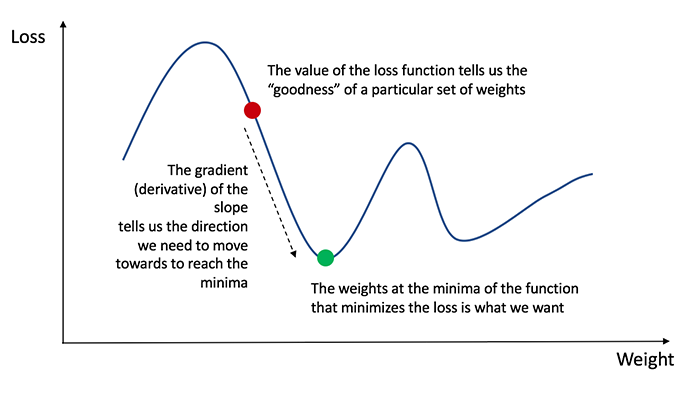

The calculus is based on the gradient of the Sigmoid curve. To understand this lets look at the previous figure.

We used the sigmoid curve to calculate the output of the neuron. If the output is a large positive or negative number, it signifies the neuron was quite confident one way or another. If the neuron is confident that the existing weight is correct, it doesn’t want to adjust it very much. Multiplying by the sigmoid curve gradient achieves this.

Mathematical formulation:
In Gradient Descent, we calculate the steepest descent along the error surface for finding local minima. For this we need to calculate the derivative of the training error with respect to the weight vector. This vector derivative is called Gradient of  the error with respect to weight vector w. The training rule can now be represented as: $weight = weight + \Delta weight $

So the weight adjustement formula becomes: $weight_{\text{j+1}} = weight_j + \frac{\partial Error }{\partial weight_j}$

After many calculations and derivatives (trust me, you don't want to go there: http://www.cs.bc.edu/~alvarez/ML/gradientSearch.pdf) you get this adjustement formula:
$\frac{\partial Error }{\partial weight_j} = error(output)* \frac{\partial  \sigma ( \sum weight_i \cdot input_i ) }{\partial weight_j}*inputs$

The gradient of the sigmoid curve, can be found by taking the derivative of the sigmoid function:

Sigmoid derivative: $\frac{\partial  \sigma ( x) }{\partial x} = \sigma(x)*(1- \sigma(x))$

In [19]:
# function implementing the derivative of the sigmoid
def sigmoid_derivative(x):
    """
    Calculate the derivative of the sigmoid function.

    Parameters:
    - x (ndarray): Input values.

    Returns:
    - derivative (ndarray): Derivative of the sigmoid function at the input.
    """
    sigmoid_x = 1 / (1 + exp(-x))
    derivative = sigmoid_x * (1 - sigmoid_x)
    return derivative

In [20]:
# Example usage:
input_value_example = 0.5  # Replace with  input value

sigmoid_derivative_example = sigmoid_derivative(input_value_example)
print("Sigmoid Derivative at", input_value_example, ":", sigmoid_derivative_example)

Sigmoid Derivative at 0.5 : 0.2350037122015945


Next we want to make the adjustment proportional to the size of the error and decide if the weights should be adjusted or not according to the inputs.

Given the final formula for updating the weights: $ weight_{j+1} = weight_j + \frac{\partial Error }{\partial weight_j} = weight_j + error(output)* \frac{\partial  \sigma ( \sum weight_i \cdot input_i ) }{\partial weight_j}*inputs$

Write here the line that would permit to update the weights 

In [21]:
# function to update neuron weights
def update_weights(inputs, weights, bias, learning_rate, error):
    """
    Update the weights and bias of a neuron using gradient descent.

    Parameters:
    - inputs (ndarray): Input values.
    - weights (ndarray): Current weights.
    - bias (float): Current bias term.
    - learning_rate (float): Learning rate for gradient descent.
    - error (float): Error (difference between actual and predicted output).

    Returns:
    - updated_weights (ndarray): Updated weights.
    - updated_bias (float): Updated bias term.
    """
    # Calculate the weighted sum
    weighted_sum = dot(inputs, weights)
    
    # Add the bias term
    weighted_sum_with_bias = weighted_sum + bias
    
    # Calculate the derivative of the sigmoid function
    sigmoid_derivative_value = sigmoid_derivative(weighted_sum_with_bias)
    
    # Update weights using gradient descent
    updated_weights = weights + learning_rate * error * sigmoid_derivative_value * inputs
    
    # Update bias using gradient descent
    updated_bias = bias + learning_rate * error * sigmoid_derivative_value
    
    return updated_weights, updated_bias

Write here the function permitting to train the neuron according to the process we just described:

In [24]:
# Adjusting the synaptic weights each time.
def train(inputs, labels, num_epochs, learning_rate):
    """
    Train a neuron using gradient descent and adjust weights each time.

    Parameters:
    - inputs (ndarray): Input values for training examples.
    - labels (ndarray): Corresponding labels for training examples.
    - num_epochs (int): Number of training epochs.
    - learning_rate (float): Learning rate for gradient descent.

    Returns:
    - weights_history (list): List containing the history of weights at each training step.
    - biases_history (list): List containing the history of biases at each training step.
    """
    num_features = inputs.shape[1]  # Number of input features
    weights = initialize_weights(num_features)
    bias = 0.0

    weights_history = []
    biases_history = []

    for epoch in range(num_epochs):
        for example_inputs, label in zip(inputs, labels):
            # Feedforward
            output = neuron_output(example_inputs, weights, bias)

            # Calculate error
            error = label - output

            # Backpropagation - Update weights and bias
            weights, bias = update_weights(example_inputs, weights, bias, learning_rate, error)

        # Save the weights and bias at each epoch
        weights_history.append(weights.copy())
        biases_history.append(bias)

    return weights_history, biases_history

In [25]:
# Example usage:
inputs_train = array([
    [0.2, 0.4, 0.6],
    [0.5, 0.1, 0.8],
    [0.9, 0.3, 0.2]
])  # Replace with training inputs

labels_train = array([0.8, 0.2, 0.5])  # Replace with training labels

num_epochs_example = 1000  # Replace with desired number of epochs
learning_rate_example = 0.1  # Replace with learning rate

weights_history, biases_history = train(inputs_train, labels_train, num_epochs_example, learning_rate_example)

# Print the final trained weights and bias
print("Trained Weights:", weights_history[-1])
print("Trained Bias:", biases_history[-1])

Trained Weights: [-0.88845111  2.56028122 -0.53872171]
Trained Bias: 0.05391586833877115


Now that we have seen all the steps separately put them all together and write a program doing the following points:
- use the exemple to train the neural network over 10000 iterations.
- print the random starting synaptic weights.
- print the new synaptic weights after training.
- what would be the prediction for the 1,0,0 exemple?

In [28]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

# Initialize random weights
def initialize_weights(num_features):
    random.seed(42)
    return random.rand(num_features)

# Feedforward function
def feedforward(inputs, weights, bias):
    weighted_sum = dot(inputs, weights)
    weighted_sum_with_bias = weighted_sum + bias
    output = sigmoid(weighted_sum_with_bias)
    return output

# Update weights function
def update_weights(inputs, weights, bias, learning_rate, error):
    weighted_sum = dot(inputs, weights)
    weighted_sum_with_bias = weighted_sum + bias
    sigmoid_derivative_value = sigmoid_derivative(weighted_sum_with_bias)
    updated_weights = weights + learning_rate * error * sigmoid_derivative_value * inputs
    updated_bias = bias + learning_rate * error * sigmoid_derivative_value
    return updated_weights, updated_bias

# Training function
def train_neuron(inputs, labels, num_epochs, learning_rate):
    num_features = inputs.shape[1]
    weights = initialize_weights(num_features)
    bias = 0.0

    for epoch in range(num_epochs):
        for example_inputs, label in zip(inputs, labels):
            output = feedforward(example_inputs, weights, bias)
            error = label - output
            weights, bias = update_weights(example_inputs, weights, bias, learning_rate, error)

    return weights, bias


In [29]:
# Example training data
inputs_train = array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1]
])

labels_train = array([0, 1, 1, 0])

# Number of training iterations
num_epochs_example = 10000

# Learning rate
learning_rate_example = 0.1

# Train the neuron
trained_weights, trained_bias = train_neuron(inputs_train, labels_train, num_epochs_example, learning_rate_example)

# Print the random starting synaptic weights
print("Random Starting Synaptic Weights:", trained_weights)

# Print the new synaptic weights after training
print("Trained Synaptic Weights:", trained_weights)

# Make a prediction for the input [1, 0, 0]
new_input = array([1, 0, 0])
prediction = feedforward(new_input, trained_weights, trained_bias)
print("Prediction for [1, 0, 0]:", prediction)

Random Starting Synaptic Weights: [ 7.34470498 -0.11708971 -1.41184325]
Trained Synaptic Weights: [ 7.34470498 -0.11708971 -1.41184325]
Prediction for [1, 0, 0]: 0.9945184338751879


In [ ]:
# Test the neural network with a new situation.
print("Considering new situation [1, 0, 0] -> ?: ")

**Optional**

1. To go further introduce in the equations the notion of learning rate.  The learning rate defines how fast our algorithm learns, it is used in the gradient descent algortihm: 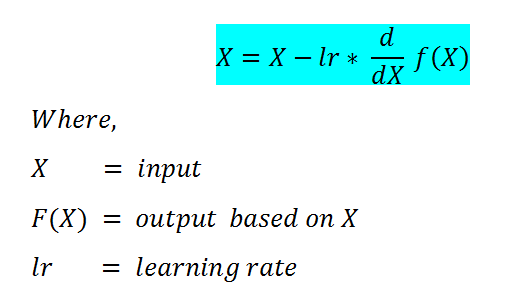

The learning rate is also described in the given Ressource R1.1

2. Add a hidden layer in our 1-layer neural network.

https://stackabuse.com/creating-a-neural-network-from-scratch-in-python/


## Keras implementation of the exemple (Optional)

Now that we have seen how to implement a perceptron from scratch use the keras library to buils the same model. Check the keras documentation and the keras cheat sheet that is on the drive.

https://keras.io/api/layers/initializers/

https://keras.io/api/layers/activations/

https://keras.io/api/losses/

https://keras.io/api/optimizers/

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation


In [ ]:
model.compile(...)

In [ ]:
X = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
y = np.array([[0, 1, 1, 0]]).T

In [ ]:
model.fit()

In [ ]:
# evaluate the keras model


In [ ]:
# Test the neural network with a new situation.
Xnew = np.array([[1, 0, 0]])
